In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data=pd.read_csv("prices-split-adjusted.csv")
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


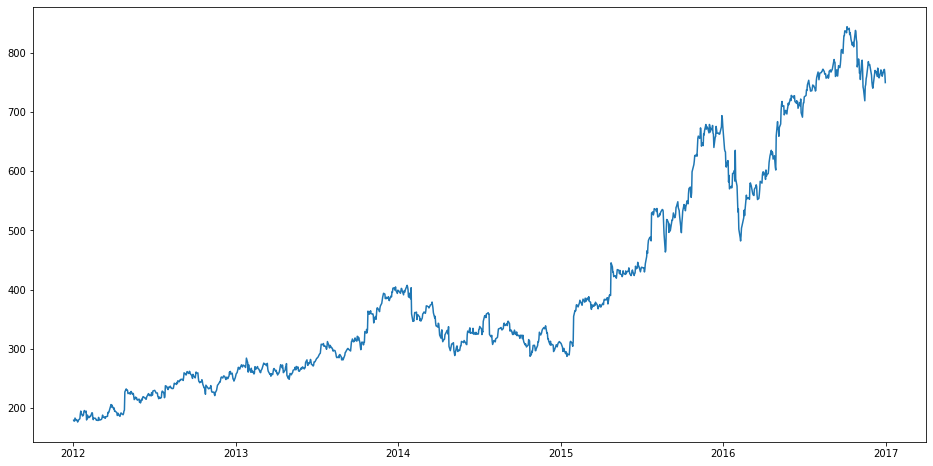

In [63]:
amazon=data[data.symbol=='AMZN']
amazon=amazon[amazon.date>"2012-01-01"]
amazon['date']=pd.to_datetime(amazon.date)
amazon.set_index('date',inplace=True)

plt.figure(figsize=(16,8))
plt.plot(amazon['close'])

In [64]:
amazon.dropna(inplace=True)

In [11]:
import ta

In [65]:
amazon=ta.add_all_ta_features(amazon, open="open",close="close",high="high",low="low",volume="volume", fillna=True)

c:\users\aczer\appdata\local\programs\python\python39\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
c:\users\aczer\appdata\local\programs\python\python39\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [66]:
amazon.tail()

,symbol,open,close,low,high,volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
date,,,,,,,,,,,,,,,,,,,,,
2016-12-23,AMZN,764.549988,760.590027,757.989990,766.500000,1976900.0,2.828886e+08,264012500.0,-0.129666,-1.569283e+06,...,-76.844617,4.061619,770.591394,-1.275922,-14.428691,-8.989250,-5.439441,-0.750320,-0.753149,324.839430
2016-12-27,AMZN,763.400024,771.400024,761.200012,774.650024,2627400.0,2.842462e+08,266639900.0,-0.076154,2.712356e+06,...,-38.861523,5.316212,770.614198,0.530412,-14.834912,-10.158383,-4.676530,1.421265,1.411259,330.877522
2016-12-28,AMZN,776.250000,772.130005,770.500000,780.000000,3279100.0,2.820924e+08,269919000.0,-0.073335,2.666831e+06,...,-36.296588,6.455326,770.626480,0.451439,-13.392452,-10.805197,-2.587256,0.094631,0.094586,331.285265
2016-12-29,AMZN,772.400024,765.150024,760.849976,773.400024,3153500.0,2.810998e+08,266765500.0,-0.025315,-8.586265e+05,...,-60.822153,6.237446,770.565286,0.661741,-12.419879,-11.128133,-1.291746,-0.903990,-0.908101,327.386487
2016-12-30,AMZN,766.469971,749.869995,748.280029,767.400024,4125300.0,2.776606e+08,262640200.0,-0.057604,-9.740923e+06,...,-95.348255,4.100829,769.937372,-3.160115,-9.135592,-10.729625,1.594033,-1.996998,-2.017207,318.851589


In [67]:
amazon=amazon.drop(['open','high','low','symbol','volume'],axis=1)
amazon.tail()

,close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
date,,,,,,,,,,,,,,,,,,,,,
2016-12-23,760.590027,2.828886e+08,264012500.0,-0.129666,-1.569283e+06,45.542896,-2096.412057,305.774719,-28754.468436,1793.239907,...,-76.844617,4.061619,770.591394,-1.275922,-14.428691,-8.989250,-5.439441,-0.750320,-0.753149,324.839430
2016-12-27,771.400024,2.842462e+08,266639900.0,-0.076154,2.712356e+06,44.211032,2907.679741,285.527683,22509.237119,1793.239907,...,-38.861523,5.316212,770.614198,0.530412,-14.834912,-10.158383,-4.676530,1.421265,1.411259,330.877522
2016-12-28,772.130005,2.820924e+08,269919000.0,-0.073335,2.666831e+06,43.801501,2122.147205,426.410894,40445.341027,1793.239907,...,-36.296588,6.455326,770.626480,0.451439,-13.392452,-10.805197,-2.587256,0.094631,0.094586,331.285265
2016-12-29,765.150024,2.810998e+08,266765500.0,-0.025315,-8.586265e+05,36.910076,-3233.522752,72.615275,-25404.302518,1777.029191,...,-60.822153,6.237446,770.565286,0.661741,-12.419879,-11.128133,-1.291746,-0.903990,-0.908101,327.386487
2016-12-30,749.869995,2.776606e+08,262640200.0,-0.057604,-9.740923e+06,35.671576,-4303.411798,-210.594887,-110889.486227,1777.029191,...,-95.348255,4.100829,769.937372,-3.160115,-9.135592,-10.729625,1.594033,-1.996998,-2.017207,318.851589


In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [141]:
scaler= MinMaxScaler(feature_range=(0,1))
close_scaler=MinMaxScaler(feature_range=(0,1))

close_scale=close_scaler.fit(df[['close']])
df=pd.DataFrame(scaler.fit_transform(amazon),columns=amazon.columns,index=amazon.index)

<function matplotlib.pyplot.show(close=None, block=None)>

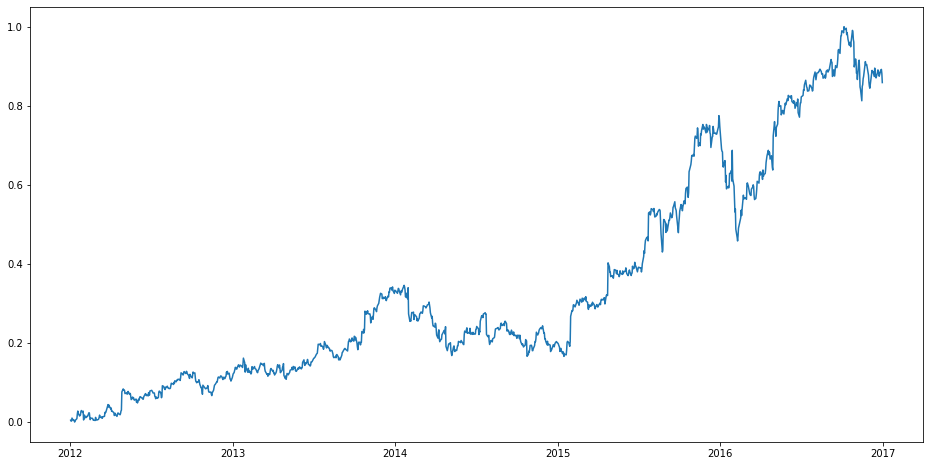

In [95]:
plt.figure(figsize=(16,8))
plt.plot(df.close)
plt.show

In [71]:
df.tail()

,close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
date,,,,,,,,,,,,,,,,,,,,,
2016-12-23,0.874677,0.924048,0.812544,0.220065,0.387747,0.389977,0.361446,0.697640,0.434448,0.985177,...,0.231554,0.574787,0.901450,0.370082,0.114239,0.224970,0.182004,0.769770,0.414768,0.874677
2016-12-27,0.890849,0.928457,0.820658,0.266405,0.404081,0.375057,0.531773,0.693865,0.442224,0.985177,...,0.611385,0.581869,0.901484,0.407446,0.107931,0.197802,0.201466,0.800078,0.497150,0.890849
2016-12-28,0.891941,0.921463,0.830785,0.268846,0.403907,0.370470,0.505035,0.720132,0.444945,0.985177,...,0.637034,0.588300,0.901503,0.405813,0.130330,0.182772,0.254762,0.781563,0.447035,0.891941
2016-12-29,0.881498,0.918240,0.821046,0.310429,0.390458,0.293273,0.322741,0.654169,0.434956,0.969168,...,0.391778,0.587070,0.901410,0.410163,0.145432,0.175267,0.287810,0.767625,0.408871,0.881498
2016-12-30,0.858639,0.907072,0.808306,0.282468,0.356573,0.279399,0.286325,0.601365,0.421989,0.969168,...,0.046517,0.575009,0.900455,0.331108,0.196429,0.184528,0.361425,0.752370,0.366656,0.858639


In [72]:
df.shape

(1258, 84)

In [218]:
X=[]
y=[]

prediction_days=120

days_to_predict=40

df_numpy=df.to_numpy()

for i in range(len(df_numpy)):
    end= i + prediction_days
    out_end= end + days_to_predict
    
    if(out_end>len(df_numpy)):
       break
    
    X.append(df_numpy[i:end, :])
    y.append(df_numpy[end:out_end,0])

       
X,y= np.array(X), np.array(y)

In [219]:
n_features= df.shape[1]
print(n_features)

84


In [220]:
X_train=X[:1000]
X_test=X[1000:]
y_train=y[:1000]
y_test=y[1000:]

In [221]:
X_train.shape

(1000, 120, 84)

In [171]:
from keras.layers import BatchNormalization
from keras.layers import Activation

In [222]:
model = Sequential()

model.add(LSTM(120,activation='tanh',return_sequences=True,input_shape=(prediction_days,n_features)))
model.add(Dropout(0.2))
model.add(LSTM(60,activation='tanh',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(90,activation='tanh',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(30,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(40))

model.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_53 (LSTM)               (None, 120, 120)          98400     
_________________________________________________________________
dropout_55 (Dropout)         (None, 120, 120)          0         
_________________________________________________________________
lstm_54 (LSTM)               (None, 120, 60)           43440     
_________________________________________________________________
dropout_56 (Dropout)         (None, 120, 60)           0         
_________________________________________________________________
lstm_55 (LSTM)               (None, 120, 90)           54360     
_________________________________________________________________
dropout_57 (Dropout)         (None, 120, 90)           0         
_________________________________________________________________
lstm_56 (LSTM)               (None, 30)              

In [223]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [224]:
history = model.fit(X_train,y_train, epochs=50, batch_size=128,validation_split=0.1)

Epoch 1/50
8/8 [==============================] - 20s 1s/step - loss: 0.0900 - accuracy: 0.0320 - val_loss: 0.3205 - val_accuracy: 0.0000e+00
Epoch 2/50
8/8 [==============================] - 8s 1s/step - loss: 0.0589 - accuracy: 0.0316 - val_loss: 0.1984 - val_accuracy: 0.0000e+00
Epoch 3/50
8/8 [==============================] - 9s 1s/step - loss: 0.0357 - accuracy: 0.0355 - val_loss: 0.1292 - val_accuracy: 0.0000e+00
Epoch 4/50
8/8 [==============================] - 8s 960ms/step - loss: 0.0301 - accuracy: 0.0202 - val_loss: 0.0777 - val_accuracy: 0.0300
Epoch 5/50
8/8 [==============================] - 8s 960ms/step - loss: 0.0214 - accuracy: 0.0319 - val_loss: 0.0474 - val_accuracy: 0.0300
Epoch 6/50
8/8 [==============================] - 7s 848ms/step - loss: 0.0174 - accuracy: 0.0343 - val_loss: 0.0334 - val_accuracy: 0.0400
Epoch 7/50
8/8 [==============================] - 8s 960ms/step - loss: 0.0144 - accuracy: 0.0356 - val_loss: 0.0338 - val_accuracy: 0.0700
Epoch 8/50
8/8 [

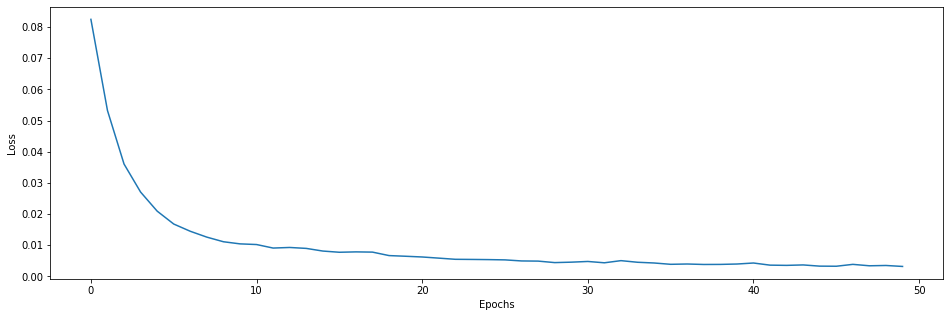

In [225]:
plt.figure(figsize=(16,5))
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

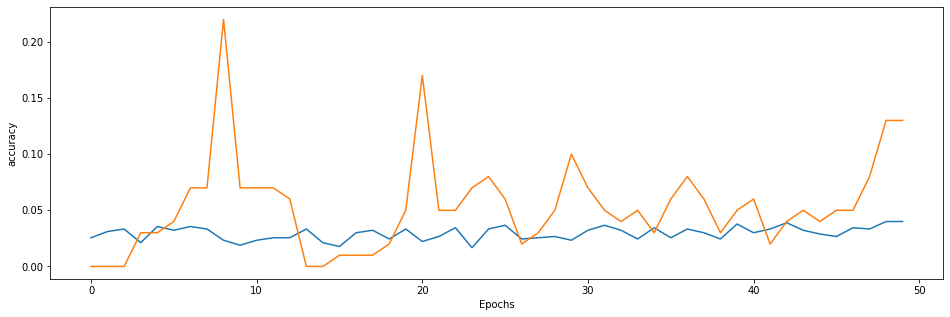

In [226]:
plt.figure(figsize=(16,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()


In [200]:
def validater(n_per_in, n_per_out):
    """
    Runs a 'For' loop to iterate through the length of the DF and create predicted values for every stated interval
    Returns a DF containing the predicted values for the model with the corresponding index values based on a business day frequency
    """
    
    # Creating an empty DF to store the predictions
    predictions = pd.DataFrame(index=df.index, columns=[df.columns[0]])

    for i in range(n_per_in, len(df)-n_per_in, n_per_out):
        # Creating rolling intervals to predict off of
        x = df[-i - n_per_in:-i]

        # Predicting using rolling intervals
        yhat = model.predict(np.array(x).reshape(1, n_per_in, n_features))

        # Transforming values back to their normal prices
        yhat = close_scaler.inverse_transform(yhat)[0]

        # DF to store the values and append later, frequency uses business days
        pred_df = pd.DataFrame(yhat, 
                               index=pd.date_range(start=x.index[-1], 
                                                   periods=len(yhat), 
                                                   freq="B"),
                               columns=[x.columns[0]])

        # Updating the predictions DF
        predictions.update(pred_df)
        
    return predictions

In [227]:
predictions = validater(120,40)

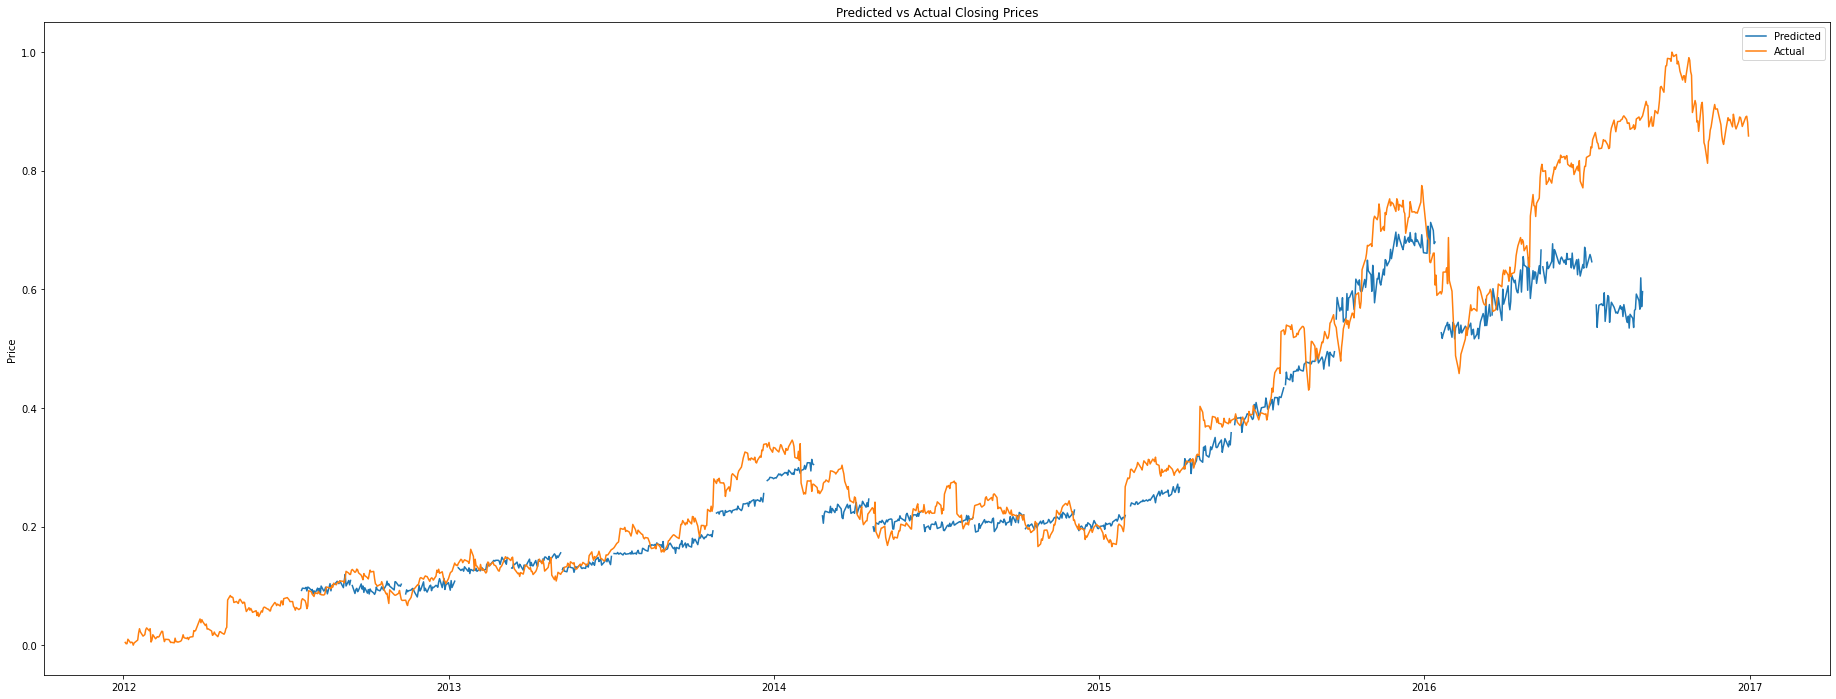

In [228]:
actual = pd.DataFrame(close_scaler.inverse_transform(df[["close"]]), 
                      index=df.index, 
                      columns=[df.columns[0]])
plt.figure(figsize=(32,12))

# Plotting those predictions
plt.plot(predictions, label='Predicted')

# Plotting the actual values
plt.plot(actual, label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.show()